In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
visa_df=pd.read_csv(r"C:\\Users\\SAMEER\\Documents\\Naresh it\\DataFiles\\Visadataset.csv")
visa_df.head()    

cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
cat_columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

**bi variate analysis**

- we already seen Uni variate

- we performed the categorical columns analysis

  - Frequency thable (vlaue counts)
 
  - Bar chart
 
  - Relative frequency table (value counts Normalized form)
 
  - pie chart
 
- We performed the numerical column analysis

    - Histogram
 
    - Distribution plots
 
    - Box plot
   
    - Outlier analysis
 
    - filling the outliers
 
- Now we will do categorical-catogorical Analysis

- Numerical - Numerical Analysis

- Categorical - Numerical Analysis

  

**Categorical-categorical**

- Lets consider two columns 

    - continent

    - Case status

In [4]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [36]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**task**

- find the certified obeservation continet wise 

- Find the Denied obsevation continent wise 


In [37]:
# step - 1 make the first condition continent=='Asia'
# step - 2 make the first condition case_status=='certified'
# step - 3 make the first condition continent : con1 & con2
# step - 4 the retrive the dataframe and take the count 

con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con3=con1 & con2
len(visa_df[con3])



11012

In [38]:
visa_df['continent'].unique()
visa_df['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [39]:
continents=visa_df['continent'].unique()
for i in continents:
    
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=con1 & con2
    count=len(visa_df[con3])
    print(f"the number of certified visa from {i} is {count}")

the number of certified visa from Asia is 11012
the number of certified visa from Africa is 397
the number of certified visa from North America is 2037
the number of certified visa from Europe is 2957
the number of certified visa from South America is 493
the number of certified visa from Oceania is 122


In [40]:
continents=visa_df['continent'].unique()
certified_list,denied_list=[],[]
for i in continents:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert_con=con1 & con2
    den_con=con2 & con3
    cert_count=len(visa_df[cert_con])
    den_count=len(visa_df[den_con])
    print(f"the number of certified visa from{i} is : {cert_count}")
    print(f"the number of denied visa from{i} is : {den_count}")
    certified_list.append(cert_count)
    denied_list.append(den_count)

the number of certified visa fromAsia is : 11012
the number of denied visa fromAsia is : 0
the number of certified visa fromAfrica is : 397
the number of denied visa fromAfrica is : 0
the number of certified visa fromNorth America is : 2037
the number of denied visa fromNorth America is : 0
the number of certified visa fromEurope is : 2957
the number of denied visa fromEurope is : 0
the number of certified visa fromSouth America is : 493
the number of denied visa fromSouth America is : 0
the number of certified visa fromOceania is : 122
the number of denied visa fromOceania is : 0


In [41]:
#DF

continents
certified_list
cols=['continents_','Certified']
df1=pd.DataFrame(zip(continents,certified_list),
                columns=cols)


In [42]:
cols=['Certified','Denied']
df3=pd.DataFrame(zip(certified_list,denied_list),
                 index=continents,
                columns=cols)
df3

,Certified,Denied
Asia,11012,0
Africa,397,0
North America,2037,0
Europe,2957,0
South America,493,0
Oceania,122,0


<Axes: >

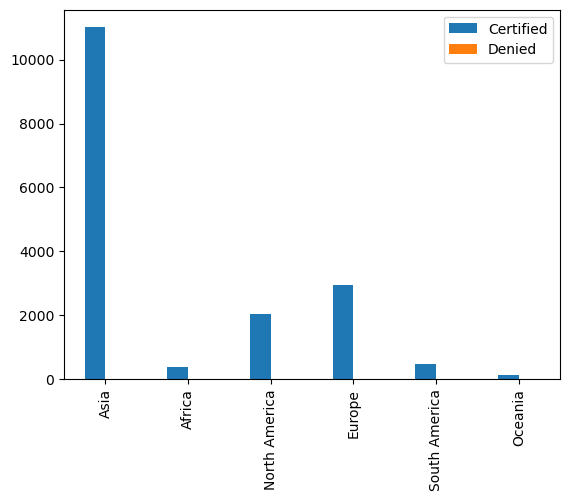

In [43]:
df3.plot(kind='bar')

**Cross tab**

- The above data frame we can make by using a method :**Cross tab**

- It is available in pandas

- It takes Two argument

    - index
 
    - column
 
- In above data frame index column is : **continent**

- IN above data Frame Data columns is : **case_status**


In [44]:
index_column=visa_df['continent']
data_columns=visa_df['case_status']
df4=pd.crosstab(visa_df['continent'],visa_df['case_status'])
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

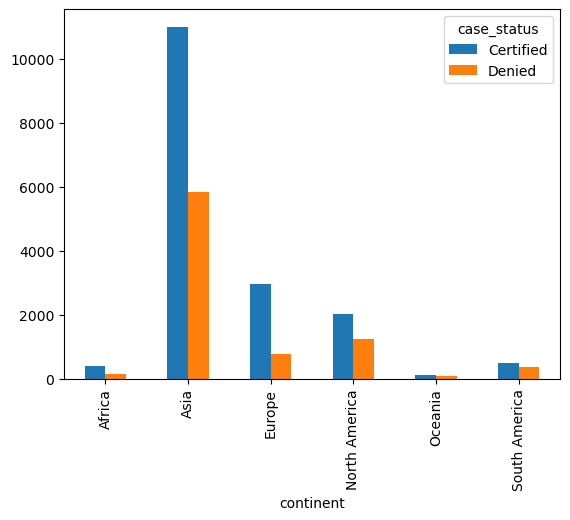

In [45]:
df4.plot(kind='bar')

**Multivariate analysis**

- Education 

- continent

- case status 

- we already know from asia there 11k Accepted visa 

- In that i wqnt futhur break down based on education 

- herealso pd.cross tab 

    - first fix your o;f any one columns out of three column 

    - then keep two column in a list and pass as data column 

In [46]:
index_column=visa_df['continent']
data_columns=[visa_df['education_of_employee'],
              visa_df['case_status']]

df5=pd.crosstab(index_column,data_columns)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

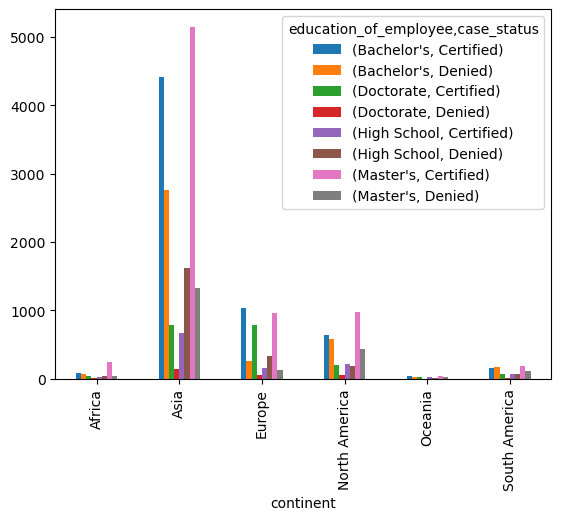

In [47]:
df5.plot(kind='bar')

In [48]:
index_column=visa_df['continent']
data_columns=[visa_df['has_job_experience'],
              visa_df['case_status']]
df6=pd.crosstab(index_column,data_columns)
df6

has_job_experience         N                Y       
case_status        Certified Denied Certified Denied
continent                                           
Africa                   133     84       264     70
Asia                    3794   3277      7218   2572
Europe                  1201    375      1756    400
North America            641    707      1396    548
Oceania                   51     38        71     32
South America            174    203       319    156

<Axes: xlabel='continent'>

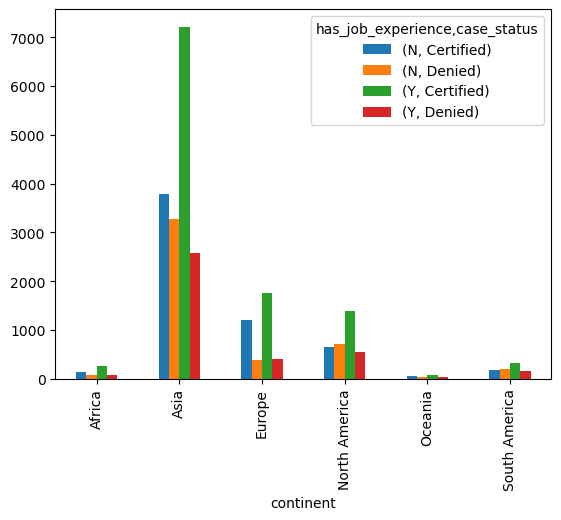

In [49]:
df6.plot(kind='bar')

In [50]:
# import the package 
# read the data 
# divide into cat and num

**Numerical vs Numerical**

- To understand Numerical columns relation we neeed to plot scatter plots 

- scatter plots gives the relation between two numerical columns

- bar chart - per chart - histogram - sctter plots

- scatters plot under matplotlib package

- **plt.scatter**

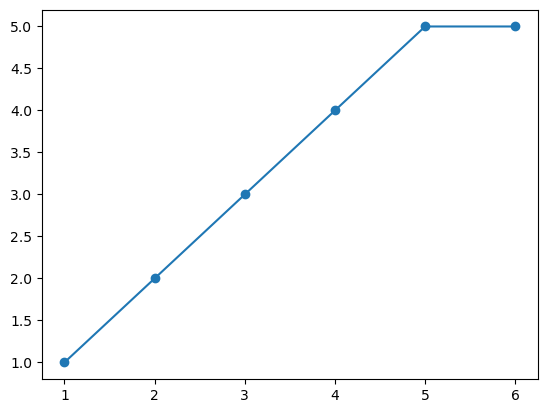

In [51]:
x=[1,2,3,4,5,6]
y=[1,2,3,4,5,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

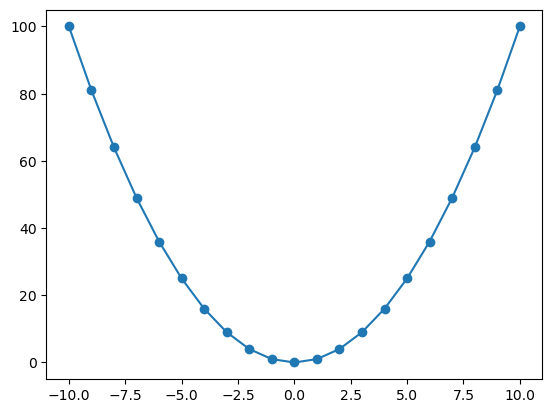

In [52]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()


In [53]:
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

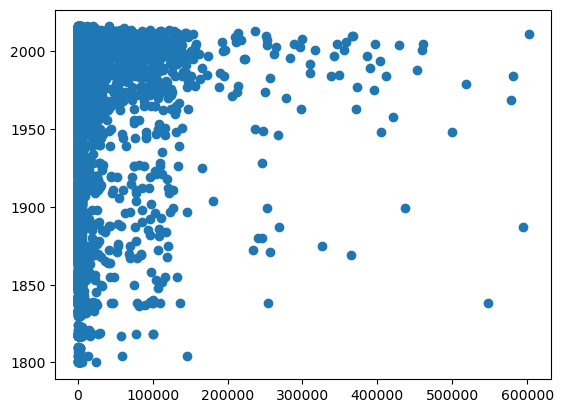

In [54]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.scatter(col1,col2)

Text(0, 0.5, 'prevailing_wage')

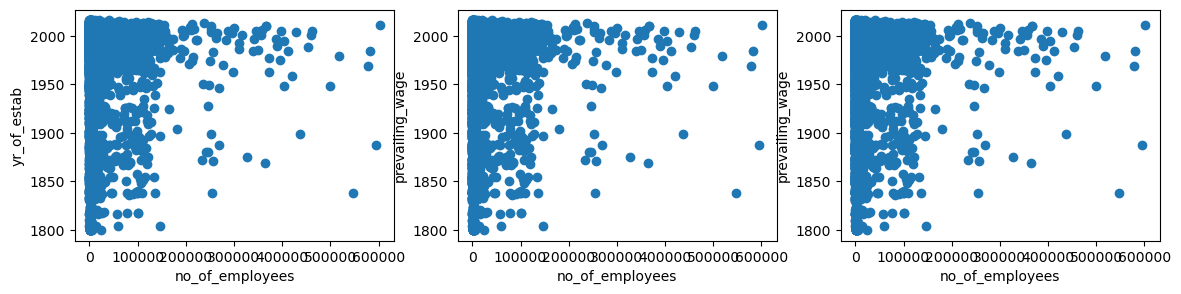

In [55]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
plt.subplot(1,3,2).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
plt.subplot(1,3,3).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')

- Implement the Covariance function 

- covariance vs Correlation 

    - Covariance will tell about the columns have relation or not 

    - Covariance will explain about relation status 

        - postive relation 

        - negative relation 

        - no relation 

    - Correlation tells about how much relation between two variables 

    - It denotes tells about how much reltion between two variable 

    - It denotes with 'r'

    - r varias from -1 to 1 

    - -1 to 0 indicates 

**method name : corr**

In [56]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat map**

- heat map is one of the important visualization method, to show the matrix form of values

- It is under **seaborn** package

- In every matrix we have heghest values and lowest values available

- Heat meap will give colour visualization

- Also it provides color bar , which colur indicates which values 

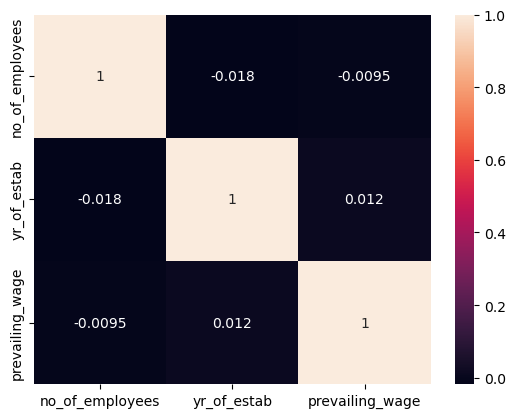

In [57]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)
plt.show()

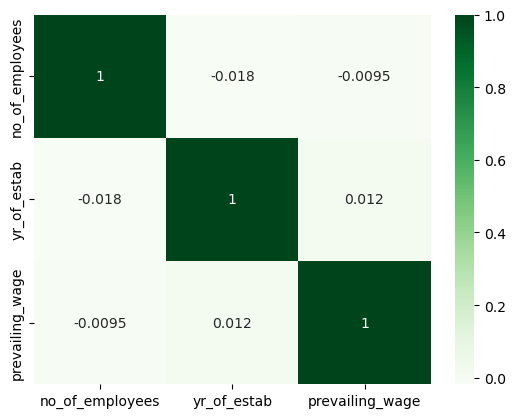

In [58]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap="Greens")
plt.show() 

- By seeing the Graphs we might not say the relation status 

- It is best practive get the percentage of reltion using correlation

- All 3 columns having approximately zero percentage of reltion

- which indicates all the columns having no relation

- No reltion means independent each other

- In mal we expect the input columns should be independent each other

- corr method gives matrix view

- we have 3 columns 3*3 total 9 fields

- if a data has 20 columns the 20*20 total 400 fileds

- Thats why always fo with heat map visualization 

# Encoding 

- encoding means convert categorical columns data to numerical columns data 

- Because ML models expect the data should be in Numerical format

- ML models developed by math alogorithms

- It is very vary important to apply encoding

- The following method are

    - map
 
    - np.where
 
    - one hot encoding
 
    - Lable encoder 

**Map**

- map is one method to convert categorical values to numerical

- Take one categorical column

- get the unique lables first

- make a dictionary lables first

- make a dictionary with assign a number to each lable

- for example case_status has two lables

    - Certified
 
    - Denied
 
- Assighn 0 to certified, 1 to Denied

- Create a dictionary lables as keys, number as values only

- {'Certified' : 0, 'Denied :1'}


In [59]:
visa_df['case_status'].unique()


array(['Denied', 'Certified'], dtype=object)

In [12]:
d={'Certified': 0,'Denied' :1}
visa_df['case_status_new']=visa_df['case_status'].map(d)
visa_df.drop('case_status_new',axis=1,inplace=True)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1


In [ ]:
pip install --upgrade seaborn

In [ ]:
# i want to apply the map method for all method for all catorical column

# step - 1 we need to get unique lables
# step - 1 we need to get a number = len unique labeles
# step - 1 we need to create a dictionary 

In [7]:
unique_lables = visa_df['case_status'].unique()
list1=[i for i in range (len(unique_lables))]
unique_lables,list1

(array(['Denied', 'Certified'], dtype=object), [0, 1])

In [13]:
visa_df=pd.read_csv(r"C:\\Users\\SAMEER\\Documents\\Naresh it\\DataFiles\\Visadataset.csv")

unique_lables = visa_df['case_status'].unique()
list1=[i for i in range (len(unique_lables))]
dict1=dict(zip(unique_lables,list1))
dict1
visa_df['case_status']=visa_df['case_status'].map(dict1)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1


In [17]:
visa_df=pd.read_csv(r"C:\\Users\\SAMEER\\Documents\\Naresh it\\DataFiles\\Visadataset.csv")
cat_columns=visa_df.select_dtypes(include='object').columns
for i in cat_columns:
    unique_lables =sorted(visa_df['case_status'].unique())
    list1=[i for i in range(len(unique_lables))]
    dict1=dict(zip(unique_lables,list1))
    dict1
    visa_df[i]=visa_df[i].map(dict1)
    visa_df 

**LableEncoder**

- lableencoder is a method to convert categorical datato numerical data

- lableencoder is a same way how we did in the above

- the for loop mmap method we explored

- but the lableencoder also do the same

- it is under **sickit-learn** we usually called as **sklearn**

- under sklearn we have calss called as preprcessing

- becouse currently we are doing data preparecessing only

- under preprecessing classs we have a method called as **lableencoder**

- sklearn

    - preprecessing
        - LableEncoder
     
- Any sklearn package has 3 step

    - step - 1 : read the package

    - step - 1 : save the package

    - step - 1 :apply fit transform on data 

In [20]:
visa_df=pd.read_csv(r"C:\\Users\\SAMEER\\Documents\\Naresh it\\DataFiles\\Visadataset.csv")

In [1]:
# step - 1 read the package 

from sklearn.preprocessing import LableEncoder

# step - 2 : save the package / call the method

le=LableEncoder()

# step - 3 : Apply fit transform on data 
visa_df['case_status']=le.fit_transfrom(visa_df['case_status'])
visa_df

ImportError: cannot import name 'LableEncoder' from 'sklearn.preprocessing' (C:\Users\SAMEER\anaconda3\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [2]:
from sklearn.preprocessing import LableEncoder
visa_df=pd.read_csv(r"C:\\Users\\SAMEER\\Documents\\Naresh it\\DataFiles\\Visadataset.csv")
cat_columns=visa_df.select_dtypes(include='object').columns
le=LableEncoder()
for i in cat_columns:
    visa_df[i]=le.fit_transfrom(visa_df[i])
visa_df
    

ImportError: cannot import name 'LableEncoder' from 'sklearn.preprocessing' (C:\Users\SAMEER\anaconda3\Lib\site-packages\sklearn\preprocessing\__init__.py)

**fit and transform**

- fot means decelop th application

- transform means precess the logic

- if you observe in map method first we eveloped dectionary logic

- the we apply that dictionary to column

- develping the dectionary is kind of fit

- apply the dictionary to column means we are transforming the data cat to num

- whenever we are transforming the data then use **fit transform**

- If we are not changing the data then only **fit**

# np.where

- using np.where also we can change the Categorical datato numerical

- but np.where is only for binary condition

- np.where is same as if-else

- if conditon is true : will apply True value

- if condition is False : will apply the False value

- so np.where use for only binary lables

- A columns should have only two unique lables


In [8]:
# value =='certified' replace with 0 
# otherwise 1
import numpy as np
visa_df=pd.read_csv(r"C:\\Users\\SAMEER\\Documents\\Naresh it\\DataFiles\\Visadataset.csv")
con=visa_df['case_status']=='certified'
visa_df['case_status']=np.where(con,0,1)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1


**one hot encoder**

- one hot means one will be ON, another will be OFF 

- ON represents with 1

- off represents with 0

- for example case status has two unique lables 

    - certified 

    - Denied 

- One hot encoder creates new columns which is equal to number of unique lables 

- for example case status will crete two new extra columns 

    - case_status_Certified

    - case_status_Denied
 
 |case_status||case_status_Certified||case_status_Denied|

 Denied                0                           1
 certified             1                           0
 denied                0                           1
 

In [2]:
# import the packages 
# read the data 
# convert cat to numerical

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


visa_df=pd.read_csv(r"C:\\Users\\SAMEER\\Documents\\Naresh it\\DataFiles\\Visadataset.csv")
visa_df.head()    

cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
cat_columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

# pd.get_dummies

In [3]:
df=pd.get_dummies(visa_df['case_status'],dtype='int')
df['case_status']=visa_df['case_status'].values
df

,Certified,Denied,case_status
0,0,1,Denied
1,1,0,Certified
2,0,1,Denied
3,0,1,Denied
4,1,0,Certified
...,...,...,...
25475,1,0,Certified
25476,1,0,Certified
25477,1,0,Certified
25478,1,0,Certified


In [4]:
df2=visa_df[['case_status']]
df2

,case_status
0,Denied
1,Certified
2,Denied
3,Denied
4,Certified
...,...
25475,Certified
25476,Certified
25477,Certified
25478,Certified


In [5]:
pd.get_dummies(visa_df,dtype='int')

,no_of_employees,yr_of_estab,prevailing_wage,case_id_EZYV01,case_id_EZYV02,case_id_EZYV03,case_id_EZYV04,case_id_EZYV05,case_id_EZYV06,case_id_EZYV07,...,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_N,full_time_position_Y,case_status_Certified,case_status_Denied
0,14513,2007,592.2029,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1
1,2412,2002,83425.6500,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,44444,2008,122996.8600,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
3,98,1897,83434.0300,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
4,1082,2005,149907.3900,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,2601,2008,77092.5700,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
25476,3274,2006,279174.7900,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
25477,1121,1910,146298.8500,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
25478,1918,1887,86154.7700,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0


- in onhot encoder a new columns will be created

- the new columns equal to number of unique lables

- because of case status two extra columns created 

- beacouse of continent 6 extra columns are created

- becouse of casid 25480 unique ids, 25480 columns created

In [6]:
count=0
for i in cat_columns[1:]:
    count=count+visa_df[i].nunique()
print(count)
print(count+len(num_columns))

27
30


In [7]:
for i in cat_columns[1:]:
    print(visa_df[i].unique(),visa_df[i].nunique())

['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania'] 6
['High School' "Master's" "Bachelor's" 'Doctorate'] 4
['N' 'Y'] 2
['N' 'Y'] 2
['West' 'Northeast' 'South' 'Midwest' 'Island'] 5
['Hour' 'Year' 'Week' 'Month'] 4
['Y' 'N'] 2
['Denied' 'Certified'] 2


**Advantages**

- using one hot encoder we will get new columns

- the new column values at a time only one will be True, another will be **false**

- which means new columns **independent each other**

- independent means **no relation**

- means no **Multi collinearaity**

- Multicolinearity is the important property in machine learning

- **Machine learning model expect the input columns should be independent each other**

- so one hto encoder gives the no multicollinearity 
 

**Disadvantage**

- the disadvantage is it will increase the many columns

- in the above example the total columns becomes 25510

- this is happened becouse of case id 

- in real time we will drop the id columns 

- eventhough if we drop still we are getting 30 columns 

- more columns means more time to process 

- we required more infrasturcture (CPU-GPU-TPU)

- This is called as **curse of dimensionality**

In [11]:
visa_df['education_of_employee'].unique()

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)